# <font color='red'> 对于Netflix影视作品数据集的数据分析</font>

## 前言

### 关于 Netflix​

Netflix 是一个流媒体平台，提供在线观看海量电视剧、电影、纪录片等内容的服务。该公司成立于 1997 年，最初只是一家 DVD 邮寄租赁服务商，如今已发展成为全球最大的流媒体平台之一。用户可以通过各种设备（如智能电视、笔记本电脑、智能手机和平板电脑）随时随地观看自己喜欢的内容。

除了提供来自各大影视公司和电视台的大量授权内容外，Netflix 还大力投资制作原创内容，推出了《怪奇物语》、《王冠》和《女子监狱》等热门剧集。Netflix 的业务遍布全球 190 多个国家，拥有数百万付费用户。

总而言之，Netflix 彻底改变了人们观看电视和电影的方式，已然成为全球数百万人娱乐生活中不可或缺的一部分。

### 关于分析用例

__业务问题__

分析数据并生成有价值的洞察，助力 Netflix 制定内容制作策略（确定应重点制作哪类节目/电影）并制定在不同国家拓展业务的方案。

__数据字段说明__

0. 节目编号 (Show_id):​​ 每个电影/电视剧的唯一标识号
1. ​类型标记 (Type):​​ 标识符 - 电影 (Movie) 或 电视剧 (TV Show)
2. ​标题 (Title):​​ 电影/电视剧的名称
3. ​导演 (Director):​​ 电影的导演或电视剧的制作人
4. ​主演名单 (Cast):​​ 参与电影/剧集的主要演员  
5. ​制片国家 (Country):​​ 电影/剧集制作所在的国家（列表形式）
6. ​上线日期 (Date_added):​​ 该片在 Netflix 平台添加的日期 (YYYY-MM-DD) 
7. ​发行年份 (Release_year):​​ 电影/剧集实际发行的年份 
8. ​分级 (Rating):​​ 电影/剧集的电视分级 (如 PG-13, TV-MA) 
9. ​时长/季数 (Duration):​​ 总时长（分钟，针对电影）或总季数（季数，针对剧集）
11. ​类型标签 (Listed_in):​​ 所属的流派/类别 
12. ​内容概要 (Description):​​ 剧情摘要描述

### 分析应解决以下业务问题​

- ​年度影片产量变化​：近20-30年电影年度新片数量如何演变？
- ​剧集与电影比例分析​：电视剧与电影的内容占比及趋势对比。
- ​剧集上线时机​：何时是电视剧的最佳发布时间窗口？
- ​核心创作人员分析​：不同类型节目/电影中导演与演员的分布规律。
- ​Netflix近年内容侧重​：公司是否更侧重发展电视剧而非电影业务？
- ​区域内容布局解析​：不同国家/地区的内容供应结构特点。

## 数据预处理

### 导入所需的库

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

import warnings
warnings.filterwarnings('ignore')

plt.rcParams['font.family'] = 'sans-serif'  # 支持中文显示
plt.rcParams['axes.unicode_minus'] = False  # 解决保存图像是负号'-'显示为方块的问题

# 中文首选字体优先级
chinese_fonts = [
    'Microsoft YaHei',    # Windows 首选
    'SimHei',             # 黑体
    'KaiTi',              # 楷体
    'PingFang SC',        # macOS 首选
    'STHeiti',            # 华文黑体
    'WenQuanYi Micro Hei' # Linux 首选
]

# 创建支持中文字体列表
plt.rcParams['font.sans-serif'] = [
    f for f in chinese_fonts + plt.rcParams['font.sans-serif'] 
    if not f.startswith('DejaVu')  # 移除默认的无中文支持字体
]

# 应用相同的设置到Seaborn
sns.set_style('darkgrid', {'font.sans-serif': plt.rcParams['font.sans-serif']})
plt.style.use('dark_background')

# 测试设置
print("当前系统可用中文字体:")
for f in set(chinese_fonts):
    if any(f.lower() in font.name.lower() for font in fm.fontManager.ttflist):
        print(f"✓ {f}")

print("\n已激活字体配置:")
print(f"font.family: {plt.rcParams['font.family']}")
print(f"font.sans-serif: {plt.rcParams['font.sans-serif'][:3]}")

当前系统可用中文字体:
✓ SimHei
✓ KaiTi
✓ Microsoft YaHei

已激活字体配置:
font.family: ['sans-serif']
font.sans-serif: ['Microsoft YaHei', 'SimHei', 'KaiTi']


### 读取数据

In [2]:
## Reading csv file into dataframe

df = pd.read_csv("netflix_titles.csv")

In [3]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
df.shape

(8807, 12)

In [5]:
df.describe(include = 'all')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8807.000000,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,NaN,17,220,514,8775
top,s8807,Movie,Zubaan,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,NaN,3207,1793,362,4
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014.180198,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.819312,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019.000000,NaN,NaN,NaN,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [7]:
df.nunique()

show_id         8807
type               2
title           8807
director        4528
cast            7692
country          748
date_added      1767
release_year      74
rating            17
duration         220
listed_in        514
description     8775
dtype: int64

In [8]:
df.isnull().sum()/len(df)*100

show_id          0.000000
type             0.000000
title            0.000000
director        29.908028
cast             9.367549
country          9.435676
date_added       0.113546
release_year     0.000000
rating           0.045418
duration         0.034064
listed_in        0.000000
description      0.000000
dtype: float64

In [9]:
## column names

df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

### 处理嵌套值

将director列的嵌套值拆分

In [10]:
# Unnesting-Directors column

dir_constraint=df['director'].apply(lambda x: str(x).split(', ')).tolist()
df1 = pd.DataFrame(dir_constraint, index = df['title']) 
df1 = df1.stack()
df1 = pd.DataFrame(df1.reset_index())
df1.rename(columns={0:'Directors'},inplace=True)
df1 = df1.drop(['level_1'],axis=1)
df1.head(10)

,title,Directors
0,Dick Johnson Is Dead,Kirsten Johnson
1,Blood & Water,nan
2,Ganglands,Julien Leclercq
3,Jailbirds New Orleans,nan
4,Kota Factory,nan
5,Midnight Mass,Mike Flanagan
6,My Little Pony: A New Generation,Robert Cullen
7,My Little Pony: A New Generation,José Luis Ucha
8,Sankofa,Haile Gerima
9,The Great British Baking Show,Andy Devonshire


将cast列的嵌套值拆分

In [11]:
## Unnesting - cast column

cast_constraint=df['cast'].apply(lambda x: str(x).split(', ')).tolist()
df2 = pd.DataFrame(cast_constraint, index = df['title']) 
df2 = df2.stack()
df2 = pd.DataFrame(df2.reset_index())
df2.rename(columns={0:'Actors'},inplace=True)
df2 = df2.drop(['level_1'],axis=1)
df2.head(10)


,title,Actors
0,Dick Johnson Is Dead,nan
1,Blood & Water,Ama Qamata
2,Blood & Water,Khosi Ngema
3,Blood & Water,Gail Mabalane
4,Blood & Water,Thabang Molaba
5,Blood & Water,Dillon Windvogel
6,Blood & Water,Natasha Thahane
7,Blood & Water,Arno Greeff
8,Blood & Water,Xolile Tshabalala
9,Blood & Water,Getmore Sithole


将listed_in列的嵌套值拆分

In [12]:
## Unnesting - listed_in column

listed_constraint=df['listed_in'].apply(lambda x: str(x).split(', ')).tolist()
df3 = pd.DataFrame(listed_constraint, index = df['title']) 
df3 = df3.stack()
df3 = pd.DataFrame(df3.reset_index())
df3.rename(columns={0:'Genre'},inplace=True)
df3 = df3.drop(['level_1'],axis=1)
df3.head(10)

,title,Genre
0,Dick Johnson Is Dead,Documentaries
1,Blood & Water,International TV Shows
2,Blood & Water,TV Dramas
3,Blood & Water,TV Mysteries
4,Ganglands,Crime TV Shows
5,Ganglands,International TV Shows
6,Ganglands,TV Action & Adventure
7,Jailbirds New Orleans,Docuseries
8,Jailbirds New Orleans,Reality TV
9,Kota Factory,International TV Shows


将country列的嵌套值拆分

In [13]:
## Unnesting - country column

country_constraint=df['country'].apply(lambda x: str(x).split(', ')).tolist()
df4 = pd.DataFrame(country_constraint, index = df['title']) 
df4 = df4.stack()
df4 = pd.DataFrame(df4.reset_index())
df4.rename(columns={0:'Country'},inplace=True)
df4 = df4.drop(['level_1'],axis=1)
df4.head(10)

,title,Country
0,Dick Johnson Is Dead,United States
1,Blood & Water,South Africa
2,Ganglands,nan
3,Jailbirds New Orleans,nan
4,Kota Factory,India
5,Midnight Mass,nan
6,My Little Pony: A New Generation,nan
7,Sankofa,United States
8,Sankofa,Ghana
9,Sankofa,Burkina Faso


连接拆分的数据框

In [14]:
# Collate all the unnested dataframes

df5 = df2.merge(df1,on=['title'],how='inner')

df6 = df5.merge(df3,on=['title'],how='inner')

df7 = df6.merge(df4,on=['title'],how='inner')

df7.head()

,title,Actors,Directors,Genre,Country
0,Dick Johnson Is Dead,nan,Kirsten Johnson,Documentaries,United States
1,Blood & Water,Ama Qamata,nan,International TV Shows,South Africa
2,Blood & Water,Ama Qamata,nan,TV Dramas,South Africa
3,Blood & Water,Ama Qamata,nan,TV Mysteries,South Africa
4,Blood & Water,Khosi Ngema,nan,International TV Shows,South Africa


In [15]:
#merging unnested data with the given dataframe

df = df7.merge(df[['show_id', 'type', 'title', 'date_added',
       'release_year', 'rating', 'duration']],on=['title'],how='left')
df.head()

,title,Actors,Directors,Genre,Country,show_id,type,date_added,release_year,rating,duration
0,Dick Johnson Is Dead,nan,Kirsten Johnson,Documentaries,United States,s1,Movie,"September 25, 2021",2020,PG-13,90 min
1,Blood & Water,Ama Qamata,nan,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
2,Blood & Water,Ama Qamata,nan,TV Dramas,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
3,Blood & Water,Ama Qamata,nan,TV Mysteries,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
4,Blood & Water,Khosi Ngema,nan,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons


In [16]:
df.shape

(201991, 11)

处理后的数据集含有201991条记录，11项属性（删去了description属性）

### 处理缺失值

在拆分嵌套值时，部分缺失值被转化为了'nan'字符串，现将其复原

In [17]:
## some columns having nan which is missing value, we have to replace

df['Actors'].replace(['nan'],[np.nan],inplace=True)
df['Directors'].replace(['nan'],[np.nan],inplace=True)
df['Country'].replace(['nan'],[np.nan],inplace=True)
df.head()

,title,Actors,Directors,Genre,Country,show_id,type,date_added,release_year,rating,duration
0,Dick Johnson Is Dead,NaN,Kirsten Johnson,Documentaries,United States,s1,Movie,"September 25, 2021",2020,PG-13,90 min
1,Blood & Water,Ama Qamata,NaN,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
2,Blood & Water,Ama Qamata,NaN,TV Dramas,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
3,Blood & Water,Ama Qamata,NaN,TV Mysteries,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
4,Blood & Water,Khosi Ngema,NaN,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons


统计缺失值

In [18]:
total_null = df.isnull().sum().sort_values(ascending = False)
percent = ((df.isnull().sum()/df.isnull().count())*100).sort_values(ascending = False)
print("Total records = ", df.shape[0])

missing_data = pd.concat([total_null,percent.round(2)],axis=1,keys=['Total Missing','In Percent'])
missing_data.head(10)

Total records =  201991


,Total Missing,In Percent
Directors,50643,25.07
Country,11897,5.89
Actors,2146,1.06
date_added,158,0.08
rating,67,0.03
duration,3,0.00
title,0,0.00
type,0,0.00
show_id,0,0.00
Genre,0,0.00


对于Actors和Directors属性，直接用字符串'Unknown Actor'和'Unknown Director'填充

In [19]:
df['Actors'].fillna('Unknown Actor', inplace=True)
df['Directors'].fillna('Unknown Director', inplace=True)

df.head()

,title,Actors,Directors,Genre,Country,show_id,type,date_added,release_year,rating,duration
0,Dick Johnson Is Dead,Unknown Actor,Kirsten Johnson,Documentaries,United States,s1,Movie,"September 25, 2021",2020,PG-13,90 min
1,Blood & Water,Ama Qamata,Unknown Director,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
2,Blood & Water,Ama Qamata,Unknown Director,TV Dramas,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
3,Blood & Water,Ama Qamata,Unknown Director,TV Mysteries,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
4,Blood & Water,Khosi Ngema,Unknown Director,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons


查看缺失duration数据的三条记录：

In [20]:
df[df.duration.isnull()]

,title,Actors,Directors,Genre,Country,show_id,type,date_added,release_year,rating,duration
126537,Louis C.K. 2017,Louis C.K.,Louis C.K.,Movies,United States,s5542,Movie,"April 4, 2017",2017,74 min,NaN
131603,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,Movies,United States,s5795,Movie,"September 16, 2016",2010,84 min,NaN
131737,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,Movies,United States,s5814,Movie,"August 15, 2016",2015,66 min,NaN


发现duration的值错误地添加到了rating中  
现将rating中的值添加回duration中，并用字符串'NR'代替ranting中的缺失值

In [21]:
df.loc[df['duration'].isnull(),'duration'] = df.loc[df['duration'].isnull(),'duration'].fillna(df['rating'])
df.loc[df['rating'].str.contains('min', na=False),'rating'] = 'NR'
df['rating'].fillna('NR',inplace=True)

df.isnull().sum()

title               0
Actors              0
Directors           0
Genre               0
Country         11897
show_id             0
type                0
date_added        158
release_year        0
rating              0
duration            0
dtype: int64

使用相同发布年份的众数填充 date_added 列的缺失值

In [22]:
for i in df[df['date_added'].isnull()]['release_year'].unique():
    date = df[df['release_year'] == i]['date_added'].mode().values[0]
    df.loc[df['release_year'] == i,'date_added'] = df.loc[df['release_year']==i,'date_added'].fillna(date)

df.isnull().sum()

title               0
Actors              0
Directors           0
Genre               0
Country         11897
show_id             0
type                0
date_added          0
release_year        0
rating              0
duration            0
dtype: int64

使用相同导演的众数填充 Country 列的缺失值

In [23]:
for i in df[df['Country'].isnull()]['Directors'].unique():
    if i in df[~df['Country'].isnull()]['Directors'].unique():
        country = df[df['Directors'] == i]['Country'].mode().values[0]
        df.loc[df['Directors'] == i,'Country'] = df.loc[df['Directors'] == i,'Country'].fillna(country)

df.isnull().sum()

title              0
Actors             0
Directors          0
Genre              0
Country         4276
show_id            0
type               0
date_added         0
release_year       0
rating             0
duration           0
dtype: int64

使用相同演员的众数填充 Country 列的剩余缺失值

In [24]:
for i in df[df['Country'].isnull()]['Actors'].unique():
    if i in df[~df['Country'].isnull()]['Actors'].unique():
        imp = df[df['Actors'] == i]['Country'].mode().values[0]
        df.loc[df['Actors'] == i,'Country'] = df.loc[df['Actors']==i,'Country'].fillna(imp)

df.isnull().sum()

title              0
Actors             0
Directors          0
Genre              0
Country         2069
show_id            0
type               0
date_added         0
release_year       0
rating             0
duration           0
dtype: int64

使用字符串 'Unknown Country' 填充 Country 列的剩余缺失值

In [25]:
df['Country'].fillna('Unknown Country',inplace=True)       
df.isnull().sum()

title           0
Actors          0
Directors       0
Genre           0
Country         0
show_id         0
type            0
date_added      0
release_year    0
rating          0
duration        0
dtype: int64

查看处理完后的缺失值统计信息

In [26]:
total_null = df.isnull().sum().sort_values(ascending = False)
percent = ((df.isnull().sum()/df.isnull().count())*100).sort_values(ascending = False)
print("Total records = ", df.shape[0])

missing_data = pd.concat([total_null,percent.round(2)],axis=1,keys=['Total Missing','In Percent'])
missing_data.head(10)

Total records =  201991


,Total Missing,In Percent
title,0,0.0
Actors,0,0.0
Directors,0,0.0
Genre,0,0.0
Country,0,0.0
show_id,0,0.0
type,0,0.0
date_added,0,0.0
release_year,0,0.0
rating,0,0.0


### 转换日期格式

In [27]:
df["date_added"] = pd.to_datetime(df['date_added'], format='mixed', dayfirst=False)
df ['duration'] = df['duration'].str.replace(" min","")
df.head(6)

,title,Actors,Directors,Genre,Country,show_id,type,date_added,release_year,rating,duration
0,Dick Johnson Is Dead,Unknown Actor,Kirsten Johnson,Documentaries,United States,s1,Movie,2021-09-25,2020,PG-13,90
1,Blood & Water,Ama Qamata,Unknown Director,International TV Shows,South Africa,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons
2,Blood & Water,Ama Qamata,Unknown Director,TV Dramas,South Africa,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons
3,Blood & Water,Ama Qamata,Unknown Director,TV Mysteries,South Africa,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons
4,Blood & Water,Khosi Ngema,Unknown Director,International TV Shows,South Africa,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons
5,Blood & Water,Khosi Ngema,Unknown Director,TV Dramas,South Africa,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons


## 数据分析

复制一列'duration2'，用于处理电影时长  
将df复制到df_中

In [28]:
df['duration2'] = df.duration.copy()
df_ = df.copy()

去除duration2中含有'Season'的属性，并转化为int类型

In [29]:
df_.loc[df_['duration2'].str.contains('Season'),'duration2'] = 0
df_['duration2'] = df_.duration2.astype('int')
df_.head()

,title,Actors,Directors,Genre,Country,show_id,type,date_added,release_year,rating,duration,duration2
0,Dick Johnson Is Dead,Unknown Actor,Kirsten Johnson,Documentaries,United States,s1,Movie,2021-09-25,2020,PG-13,90,90
1,Blood & Water,Ama Qamata,Unknown Director,International TV Shows,South Africa,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,0
2,Blood & Water,Ama Qamata,Unknown Director,TV Dramas,South Africa,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,0
3,Blood & Water,Ama Qamata,Unknown Director,TV Mysteries,South Africa,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,0
4,Blood & Water,Khosi Ngema,Unknown Director,International TV Shows,South Africa,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,0


In [30]:
df_.duration2.describe()

count    201991.000000
mean         77.152789
std          52.269154
min           0.000000
25%           0.000000
50%          95.000000
75%         112.000000
max         312.000000
Name: duration2, dtype: float64

查看每一列的唯一值数量

In [31]:
df_.T.apply(lambda x: x.nunique(), axis=1)

title            8807
Actors          36440
Directors        4994
Genre              42
Country           128
show_id          8807
type                2
date_added       1714
release_year       74
rating             14
duration          220
duration2         206
dtype: int64

绘制电影时长的分布图

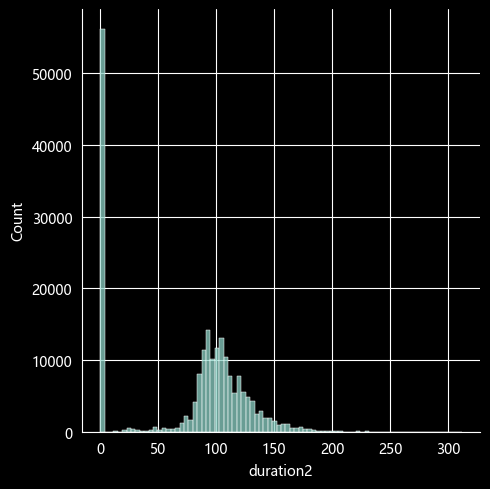

In [32]:
## Histogram to see the distribution of duration

sns.displot(df_['duration2'])
plt.show()

- 可以看出，电影的时长集中在100分钟左右

将duration2中的连续值离散化

In [33]:
bins = [-1,1,50,80,100,120,150,200,315]
labels = ['<1','1-50','50-80','80-100','100-120','120-150','150-200','200-315']
df_['duration2'] = pd.cut(df_['duration2'],bins = bins, labels = labels )

df_.head()

,title,Actors,Directors,Genre,Country,show_id,type,date_added,release_year,rating,duration,duration2
0,Dick Johnson Is Dead,Unknown Actor,Kirsten Johnson,Documentaries,United States,s1,Movie,2021-09-25,2020,PG-13,90,80-100
1,Blood & Water,Ama Qamata,Unknown Director,International TV Shows,South Africa,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,<1
2,Blood & Water,Ama Qamata,Unknown Director,TV Dramas,South Africa,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,<1
3,Blood & Water,Ama Qamata,Unknown Director,TV Mysteries,South Africa,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,<1
4,Blood & Water,Khosi Ngema,Unknown Director,International TV Shows,South Africa,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,<1


将离散化后的值填回duration列，并删除duration2

In [34]:
df_.loc[~df_['duration'].str.contains('Season'),'duration'] = df_.loc[~df_['duration'].str.contains('Season'),'duration2']
df_.drop(['duration2'],axis=1,inplace=True)

df_.head()

,title,Actors,Directors,Genre,Country,show_id,type,date_added,release_year,rating,duration
0,Dick Johnson Is Dead,Unknown Actor,Kirsten Johnson,Documentaries,United States,s1,Movie,2021-09-25,2020,PG-13,80-100
1,Blood & Water,Ama Qamata,Unknown Director,International TV Shows,South Africa,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons
2,Blood & Water,Ama Qamata,Unknown Director,TV Dramas,South Africa,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons
3,Blood & Water,Ama Qamata,Unknown Director,TV Mysteries,South Africa,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons
4,Blood & Water,Khosi Ngema,Unknown Director,International TV Shows,South Africa,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons


拆分date_added字段，提取出年、月、日、星期

In [35]:
from datetime import datetime
from dateutil.parser import parse
df_["year_added"] = df_['date_added'].dt.year
df_["year_added"] = df_["year_added"].astype("Int64")
df_["month_added"] = df_['date_added'].dt.month
df_['month_name'] = df['date_added'].dt.month_name()
df_["month_added"] = df_["month_added"].astype("Int64")
df_["day_added"] = df_['date_added'].dt.day
df_["day_added"] = df_["day_added"].astype("Int64")
df_['Weekday_added'] = df_['date_added'].dt.day_name()
df_.head()

,title,Actors,Directors,Genre,Country,show_id,type,date_added,release_year,rating,duration,year_added,month_added,month_name,day_added,Weekday_added
0,Dick Johnson Is Dead,Unknown Actor,Kirsten Johnson,Documentaries,United States,s1,Movie,2021-09-25,2020,PG-13,80-100,2021,9,September,25,Saturday
1,Blood & Water,Ama Qamata,Unknown Director,International TV Shows,South Africa,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,2021,9,September,24,Friday
2,Blood & Water,Ama Qamata,Unknown Director,TV Dramas,South Africa,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,2021,9,September,24,Friday
3,Blood & Water,Ama Qamata,Unknown Director,TV Mysteries,South Africa,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,2021,9,September,24,Friday
4,Blood & Water,Khosi Ngema,Unknown Director,International TV Shows,South Africa,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,2021,9,September,24,Friday


去除标题中的括号

In [36]:
df_['title'] = df_['title'].str.replace(r"\(.*\)","")
df_.head()

,title,Actors,Directors,Genre,Country,show_id,type,date_added,release_year,rating,duration,year_added,month_added,month_name,day_added,Weekday_added
0,Dick Johnson Is Dead,Unknown Actor,Kirsten Johnson,Documentaries,United States,s1,Movie,2021-09-25,2020,PG-13,80-100,2021,9,September,25,Saturday
1,Blood & Water,Ama Qamata,Unknown Director,International TV Shows,South Africa,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,2021,9,September,24,Friday
2,Blood & Water,Ama Qamata,Unknown Director,TV Dramas,South Africa,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,2021,9,September,24,Friday
3,Blood & Water,Ama Qamata,Unknown Director,TV Mysteries,South Africa,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,2021,9,September,24,Friday
4,Blood & Water,Khosi Ngema,Unknown Director,International TV Shows,South Africa,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,2021,9,September,24,Friday


### 单变量分析

分析不同电影/电视节目类型（Genre）的作品数量分布，并可视化展示前15个最常见的类型

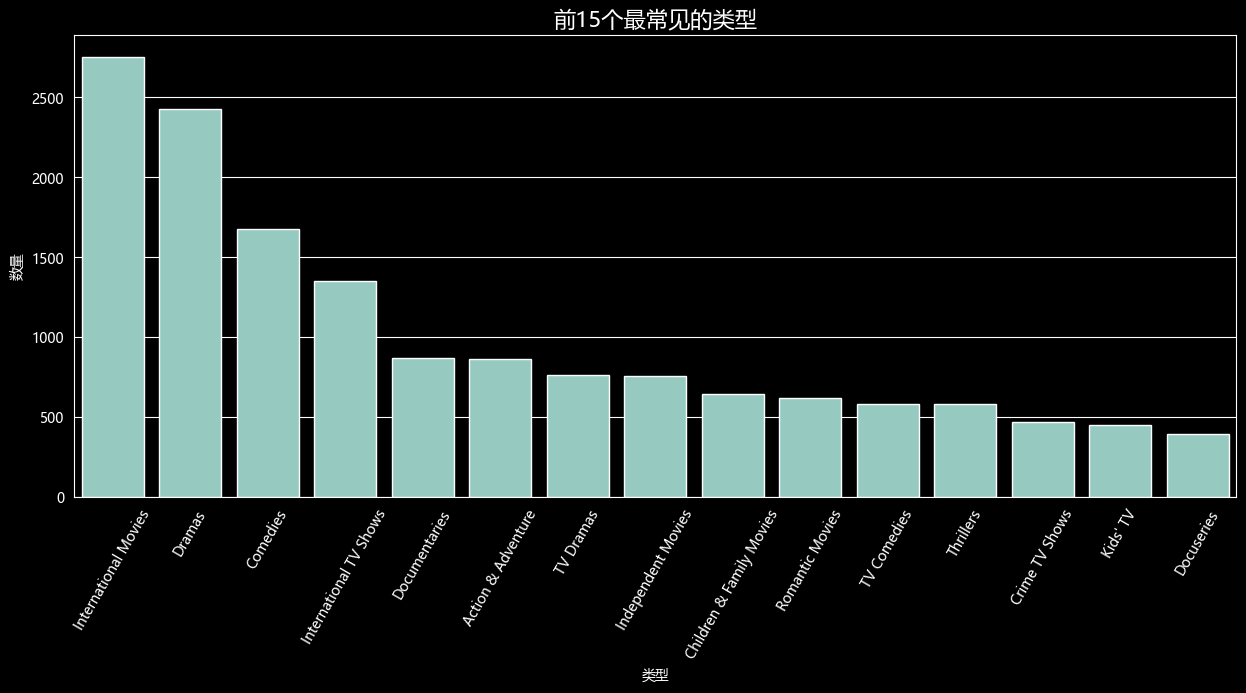

In [37]:
df_genre=df_.groupby(['Genre']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:15]
plt.figure(figsize=(15,6))
sns.barplot(x = "Genre",y = 'title', data = df_genre)
plt.xticks(rotation = 60)
plt.title('前15个最常见的类型', fontsize=16)
plt.ylabel('数量')
plt.xlabel('类型')
plt.show()

- 国际电影、戏剧和喜剧是数量最多的影视作品

统计电影和电视节目的比例

In [38]:
df_pie = df_.groupby(['type']).agg({'title':'nunique'}).reset_index()
df_pie

,type,title
0,Movie,6131
1,TV Show,2676


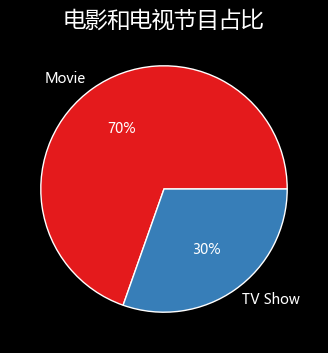

In [39]:
colors =["#e41a1c", "#377eb8"]
plt.figure(figsize=(10,4))

plt.pie(df_pie['title'], labels = df_pie['type'], colors = colors, autopct='%.0f%%')
plt.title('电影和电视节目占比', fontsize=16)
plt.show()

- Netflix上的作品中电影占70%，电视剧占30%

统计不同国家作品数量

In [40]:
df_['Country'] = df_['Country'].str.replace(',', '')
df_.head()

,title,Actors,Directors,Genre,Country,show_id,type,date_added,release_year,rating,duration,year_added,month_added,month_name,day_added,Weekday_added
0,Dick Johnson Is Dead,Unknown Actor,Kirsten Johnson,Documentaries,United States,s1,Movie,2021-09-25,2020,PG-13,80-100,2021,9,September,25,Saturday
1,Blood & Water,Ama Qamata,Unknown Director,International TV Shows,South Africa,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,2021,9,September,24,Friday
2,Blood & Water,Ama Qamata,Unknown Director,TV Dramas,South Africa,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,2021,9,September,24,Friday
3,Blood & Water,Ama Qamata,Unknown Director,TV Mysteries,South Africa,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,2021,9,September,24,Friday
4,Blood & Water,Khosi Ngema,Unknown Director,International TV Shows,South Africa,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,2021,9,September,24,Friday


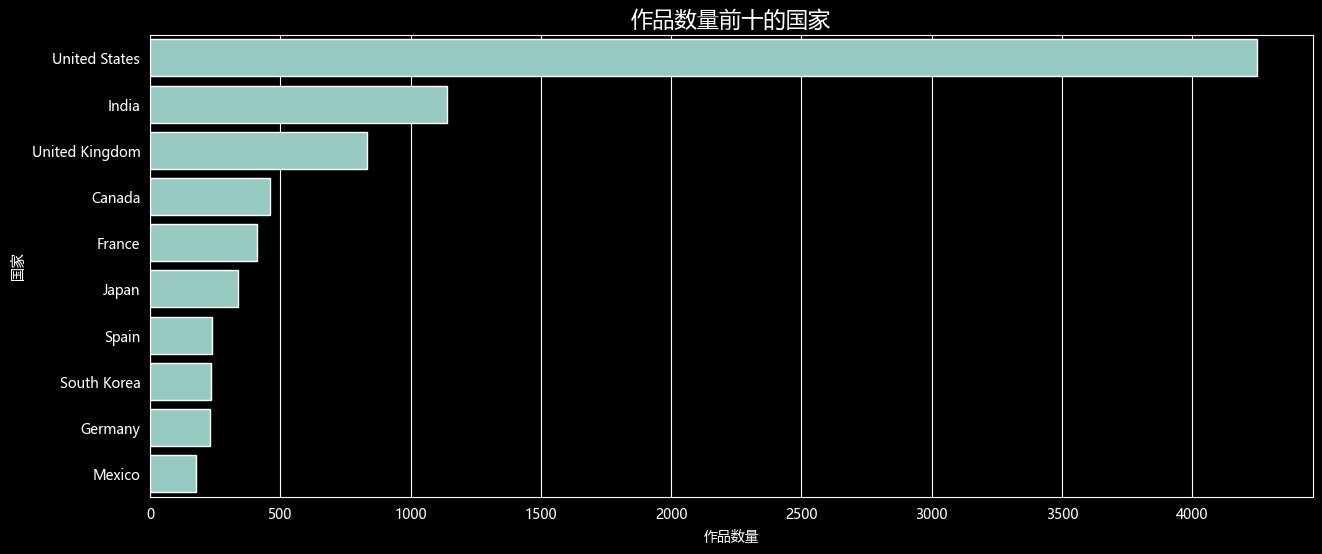

In [41]:
df_country = df_.groupby(['Country']).agg({'title':'nunique'}).reset_index().sort_values(by=['title'],ascending=False)[:10]
plt.figure(figsize=(15,6))
sns.barplot(y = "Country",x = 'title', data = df_country)
plt.title('作品数量前十的国家', fontsize=16)
plt.xlabel('作品数量')
plt.ylabel('国家')
plt.show()

- 美国出品的影视作品数量远高于其他国家，印度、英国分别位于第二第三

对各个分级中作品数量的统计

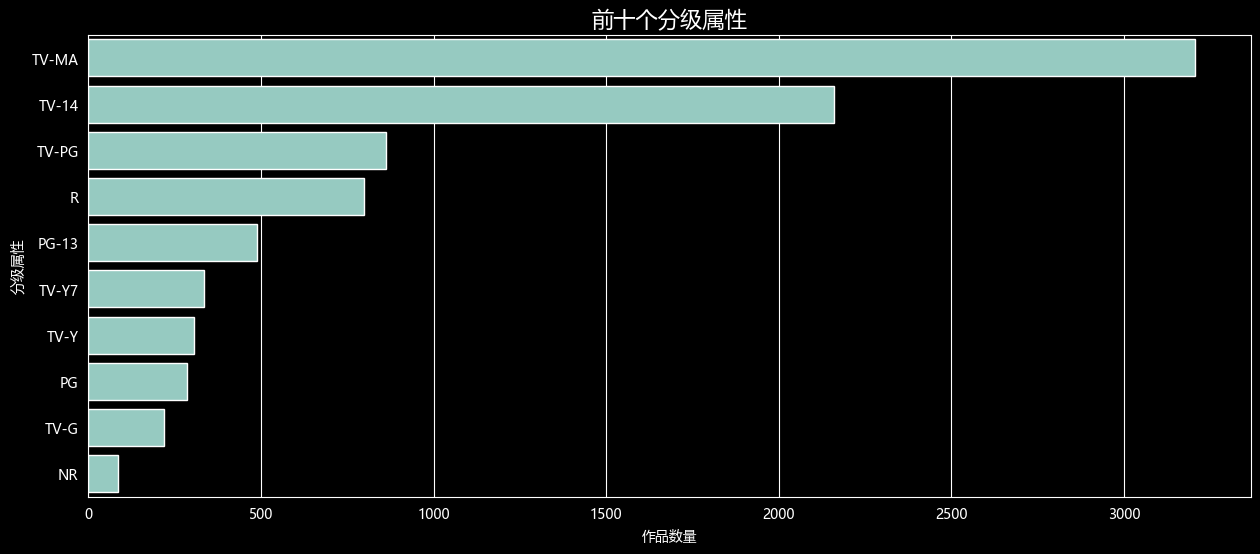

In [42]:
df_rating = df_.groupby(['rating']).agg({'title':'nunique'}).reset_index().sort_values(by=['title'],ascending=False)[:10]

plt.figure(figsize=(15,6))
sns.barplot(y = "rating",x = 'title', data = df_rating)
plt.title('前十个分级属性', fontsize=16)
plt.xlabel('作品数量')
plt.ylabel('分级属性')
plt.show()

| 分级标识 | 适用年龄       | 典型内容特点                     | 代表作品举例          |
|----------|----------------|----------------------------------|-----------------------|
| **TV-Y** | 2–6岁         | 无暴力恐怖内容，情节简单温和     | 《巧虎》系列          |
| **TV-Y7**| 7岁以上        | 含轻微幻想暴力或喜剧冲突         | 《汪汪队立大功》      |
| **G/TV-G**| 全年龄段       | 无争议性内容，适合家庭观看       | 迪士尼经典动画        |
| **PG/TV-PG**| 家长指导建议   | 轻微暴力、简短粗话或暗示性内容   | 《哈利·波特》系列     |
| **PG-13** | 13岁以上       | 中度暴力、短暂性暗示或部分粗话   | 《复仇者联盟》系列    |
| **TV-14** | 14岁以上       | 强烈暴力、性暗示、毒品话题       | 《怪奇物语》          |
| **R**     | 17岁以下需家长陪同 | 高强度暴力、裸露镜头、性内容   | 《小丑》              |
| **TV-MA** | 18岁以上       | 露骨性场景、血腥暴力、重度粗话   | 《纸牌屋》《性爱自修室》|
| **NC-17** | 18岁以上       | 极端暴力、性暴露或扭曲心理描写   | 《色戒》未删减版      |

- Netflix上的作品多为TV-MA和TV-14，以血腥暴力内容为主

对作品时长的统计

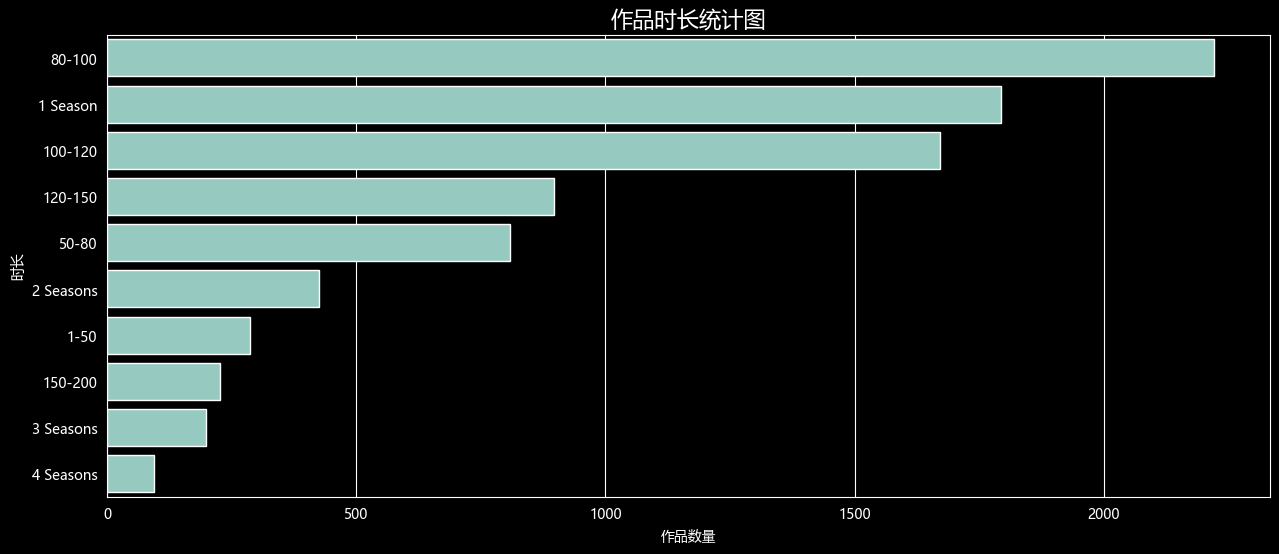

In [43]:
df_duration = df_.groupby(['duration']).agg({'title':'nunique'}).reset_index().sort_values(by=['title'],ascending=False)[:10]

plt.figure(figsize=(15,6))
sns.barplot(y = "duration",x = 'title', data = df_duration)
plt.title('作品时长统计图', fontsize=16)
plt.xlabel('作品数量')
plt.ylabel('时长')
plt.show()

- 多数电影时长为80-100分钟，多数电视剧长度为一到两季

对演员参演作品数量的统计

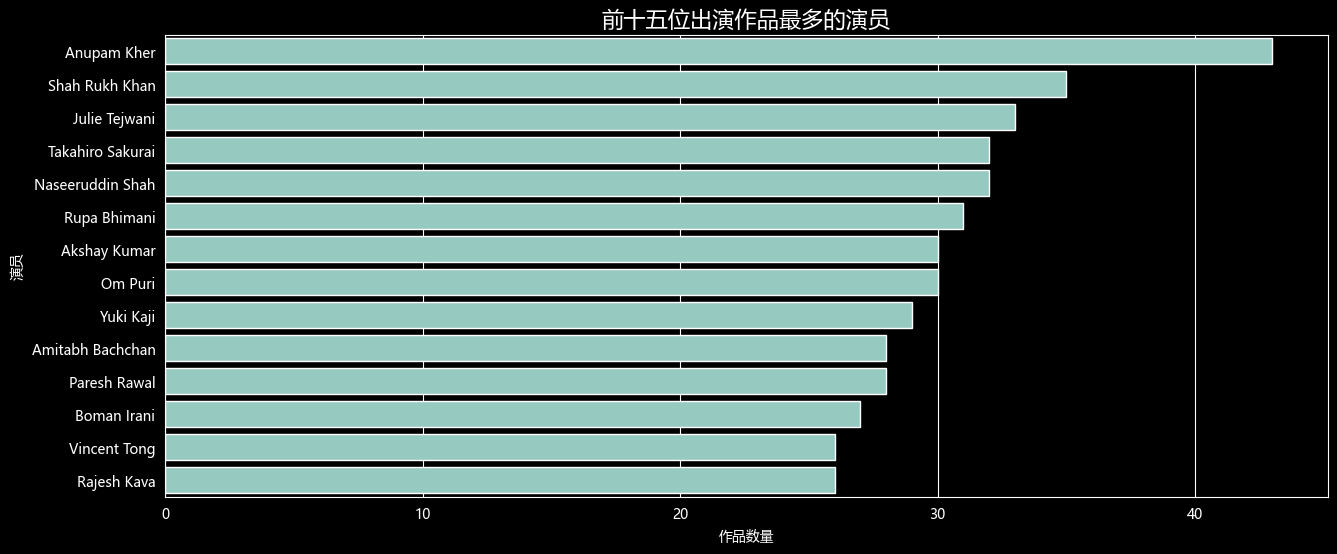

In [44]:
df_actors = df_.groupby(['Actors']).agg({'title':'nunique'}).reset_index().sort_values(by=['title'],ascending=False)[:15]
df_actors = df_actors[df_actors['Actors']!='Unknown Actor']
plt.figure(figsize=(15,6))
sns.barplot(y = "Actors",x = 'title', data = df_actors )
plt.title('前十五位出演作品最多的演员', fontsize=16)
plt.xlabel('作品数量')
plt.ylabel('演员')
plt.show()

- Anupam Kher、SRK、Julie Tejwani、Naseeruddin Shah 和 Takahiro Sakurai 是出演作品最多的几位演员

对导演出版作品数量的统计

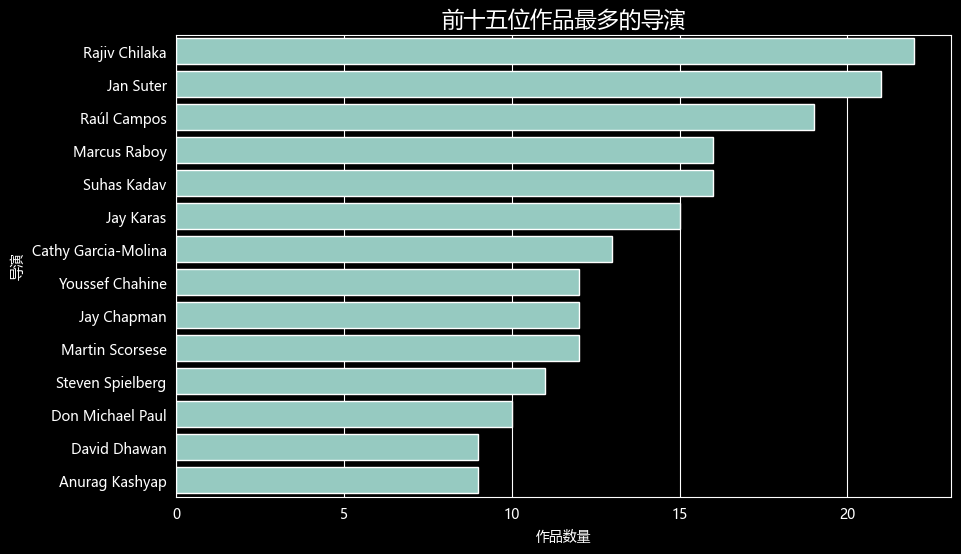

In [45]:
df_directors = df_.groupby(['Directors']).agg({'title':'nunique'}).reset_index().sort_values(by=['title'],ascending=False)[:15]
df_directors = df_directors[df_directors['Directors']!='Unknown Director']
plt.figure(figsize=(10,6))
sns.barplot(y = "Directors",x = 'title', data = df_directors )
plt.title('前十五位作品最多的导演', fontsize=16)
plt.xlabel('作品数量')
plt.ylabel('导演')
plt.show()

- Rajiv Chilaka, Jan Suter 和 Raul Campos 是 Netflix 上最受欢迎的导演

不同年份新增作品数量统计

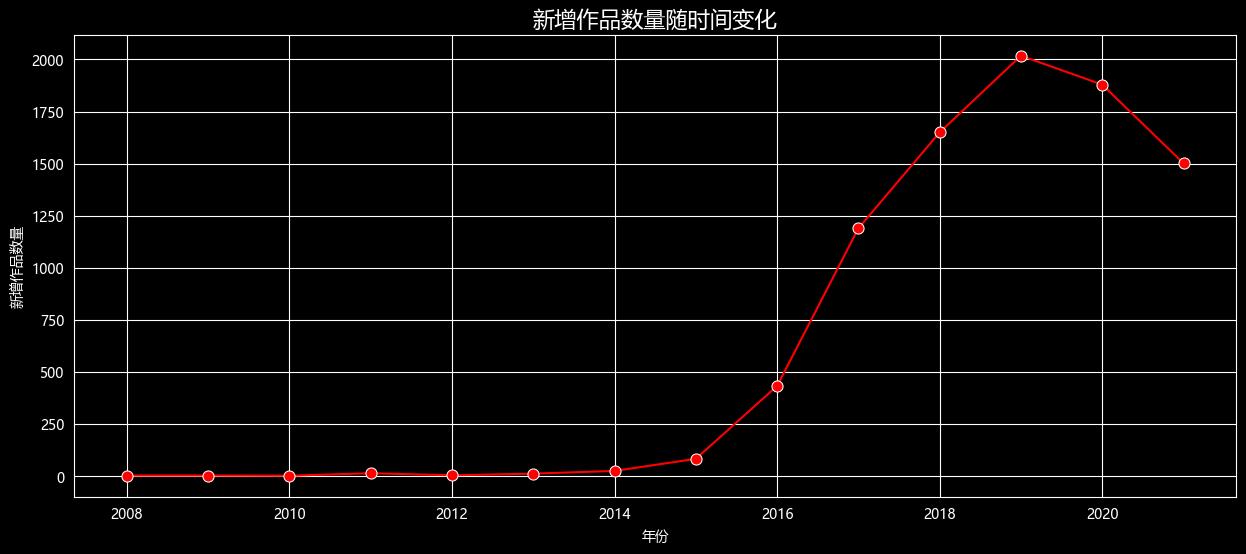

In [46]:
df_year = df_.groupby(['year_added']).agg({'title':'nunique'}).reset_index()

plt.figure(figsize=(15,6))
sns.lineplot(x = "year_added",y = 'title', data = df_year, color = 'red', marker='o', markersize=8)
plt.title('新增作品数量随时间变化', fontsize=16)
plt.xlabel('年份')
plt.ylabel('新增作品数量')
plt.show()

分别查看电影和电视剧的变化趋势

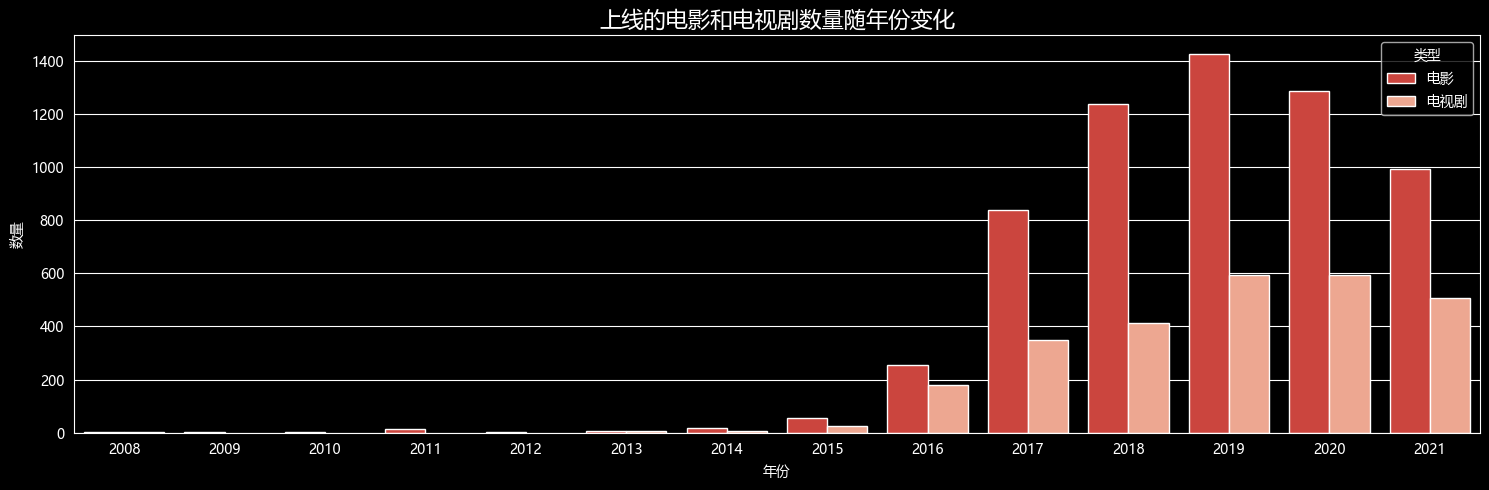

In [47]:
df_deduplicated = df_.drop_duplicates(subset=['year_added', 'title'])
df_deduplicated['类型'] = df_deduplicated['type'].map({
    'Movie': '电影',
    'TV Show': '电视剧'
})
fig = plt.figure(figsize = (15,5))
sns.countplot(data = df_deduplicated, x = 'year_added', hue = '类型', palette ="Reds_r")
plt.title('上线的电影和电视剧数量随年份变化', fontsize=16)
plt.xlabel('年份')
plt.ylabel('数量')
plt.tight_layout()
plt.show()

- 从 2008 年到 2019 年，Netflix 的内容量持续增加。然后从这里开始减少（可能是由于疫情影响）

不同月份上线作品数量

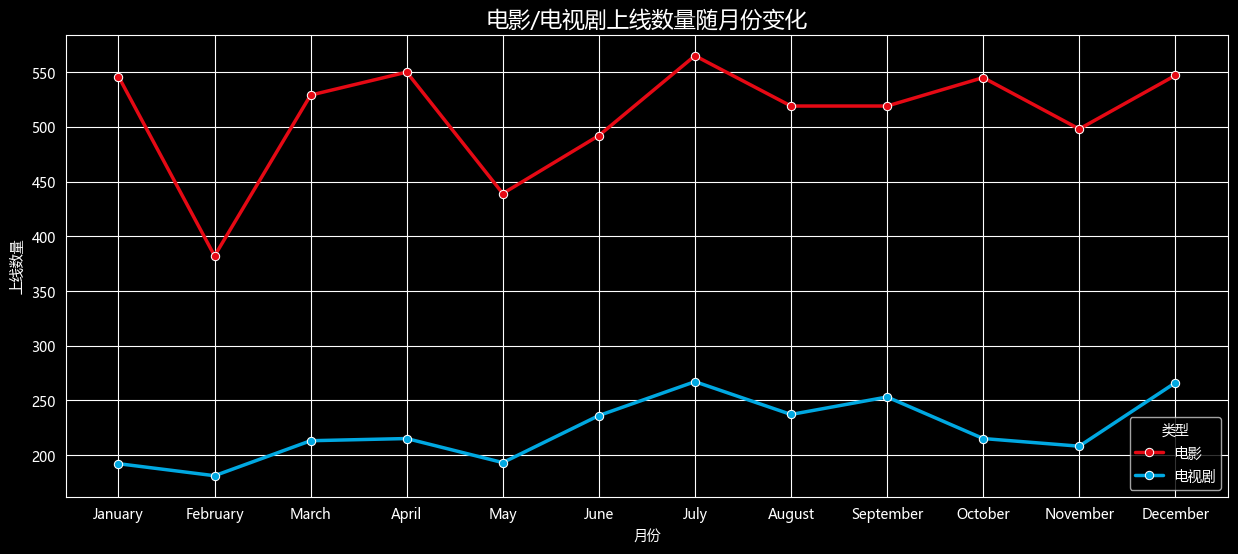

In [48]:
df_month = df_.groupby(['month_name', 'type']).agg({'title':'nunique'}).reset_index()
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
df_month['month_name'] = pd.Categorical(
    df_month['month_name'], 
    categories=month_order,
    ordered=True
)
df_month = df_month.sort_values(by='month_name')
df_month['类型'] = df_month['type'].map({
    'Movie': '电影',
    'TV Show': '电视剧'
})
plt.figure(figsize=(15,6))
sns.lineplot(x = "month_name",y = 'title', data = df_month, hue = '类型', 
            palette={'电影': '#E50914', '电视剧': '#00A8E1'}, linewidth=2.5, marker='o')
plt.title('电影/电视剧上线数量随月份变化', fontsize=16)
plt.xlabel('月份')
plt.ylabel('上线数量')
plt.show()

- 在一年中，暑期上线作品数量较多

一月内作品更新数量分布

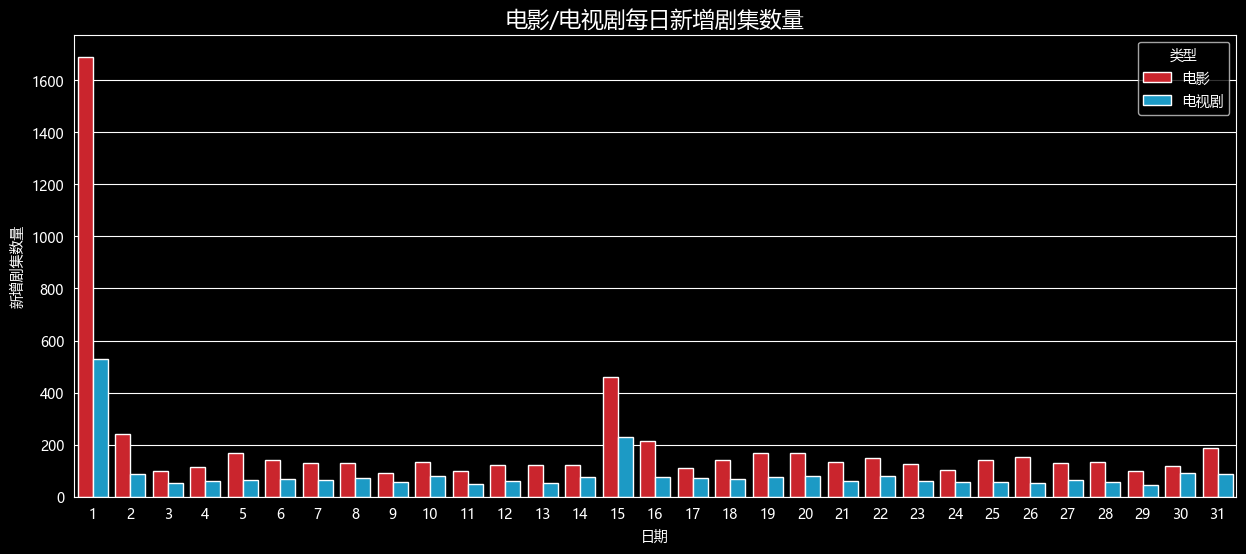

In [49]:
df_day = df_.groupby(['day_added', 'type']).agg({'title':'nunique'}).reset_index()
df_day['类型'] = df_day['type'].map({'Movie':'电影', 'TV Show':'电视剧'})

plt.figure(figsize=(15,6))
sns.barplot(x = "day_added",y = 'title', data = df_day, hue = '类型', palette={'电影': '#E50914', '电视剧': '#00A8E1'})
plt.title('电影/电视剧每日新增剧集数量', fontsize=16)
plt.xlabel('日期')
plt.ylabel('新增剧集数量')
plt.show()

- 每月的1日和15日是更新的高峰期

电影/电视剧更新数量在一周内的分布

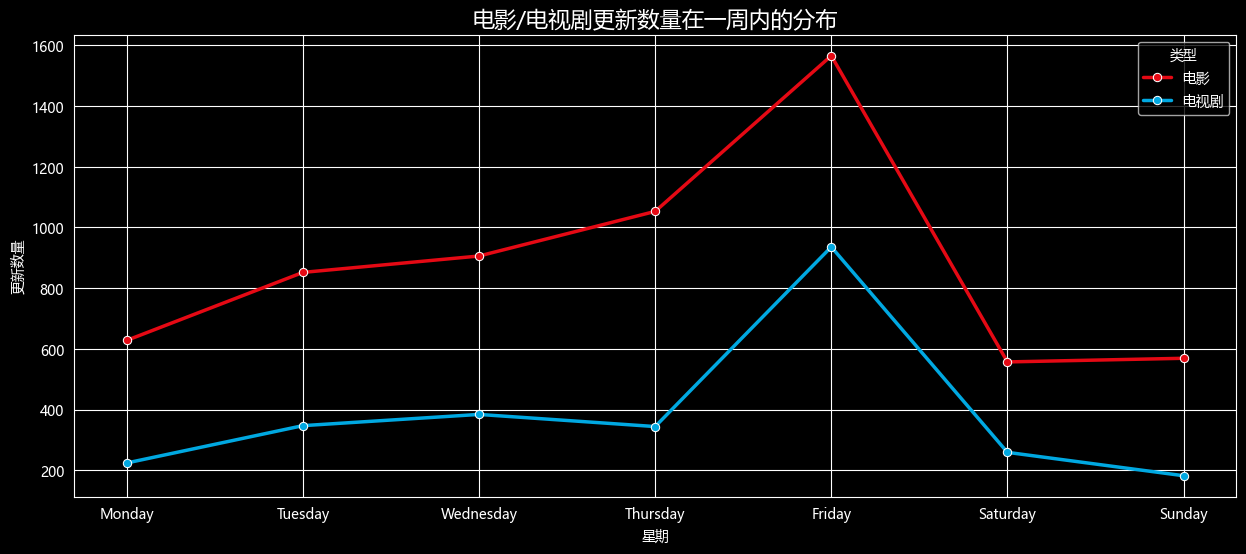

In [50]:
df_weekday = df_.groupby(['Weekday_added', 'type']).agg({'title':'nunique'}).reset_index()
df_weekday['类型'] = df_weekday['type'].map({'Movie':'电影', 'TV Show':'电视剧'})

# 定义正确的星期顺序
weekdays_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df_weekday['Weekday_added'] = pd.Categorical(
    df_weekday['Weekday_added'],
    categories=weekdays_order,
    ordered=True
)
df_weekday = df_weekday.sort_values('Weekday_added')

plt.figure(figsize=(15,6))
sns.lineplot(x = "Weekday_added",y = 'title', data = df_weekday, hue = '类型', linewidth=2.5, marker='o', palette={'电影': '#E50914', '电视剧': '#00A8E1'})
plt.title('电影/电视剧更新数量在一周内的分布', fontsize=16)
plt.xlabel('星期')
plt.ylabel('更新数量')
plt.show()

- 可以看出，周五更新的剧集数量最多

箱线图分析：电影与电视节目的发行年份分布

(2000.0, 2020.0)

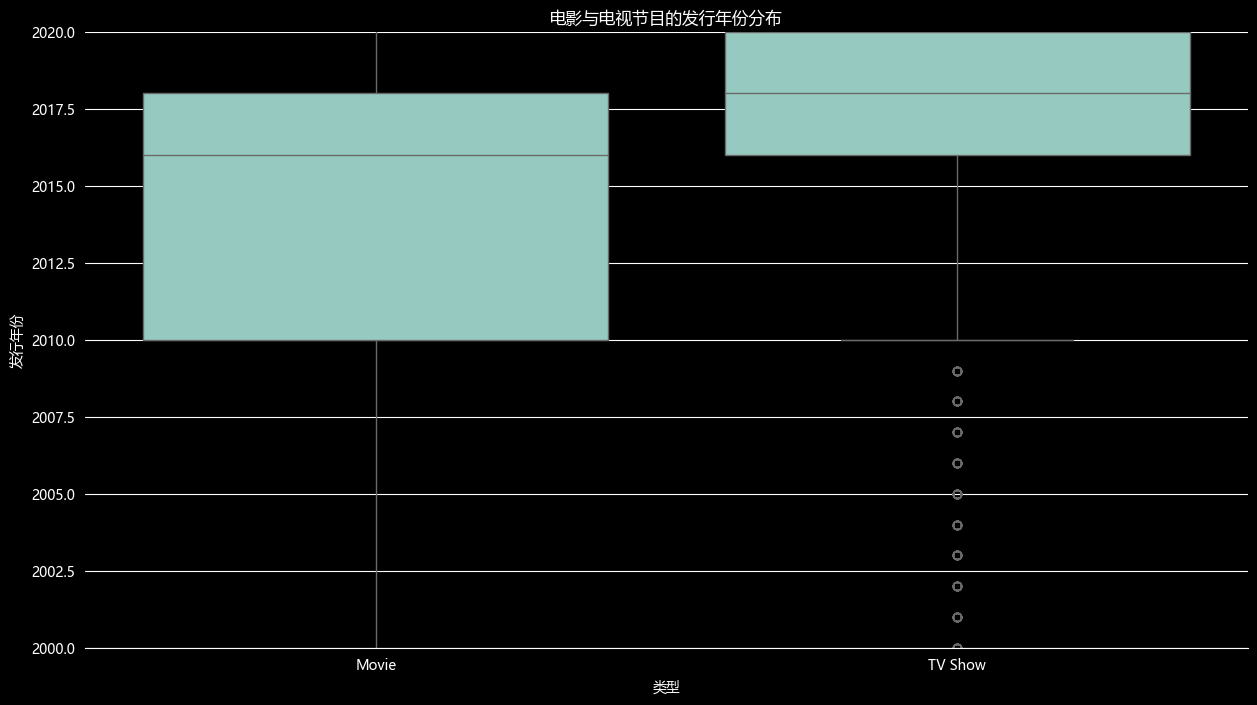

In [51]:
plt.figure(figsize=(15,8))
sns.boxplot(x='type', y='release_year', data=df_, )
sns.despine(left=True)
plt.title('电影与电视节目的发行年份分布')
plt.xlabel('类型')
plt.ylabel('发行年份')
plt.ylim(2000,2020)

- 可以看到。电视剧发布时间的均值更大，这意味着近年来电视节目的发行量越来越多

### 多变量分析

热力图分析：Netflix年度新增内容月度分布

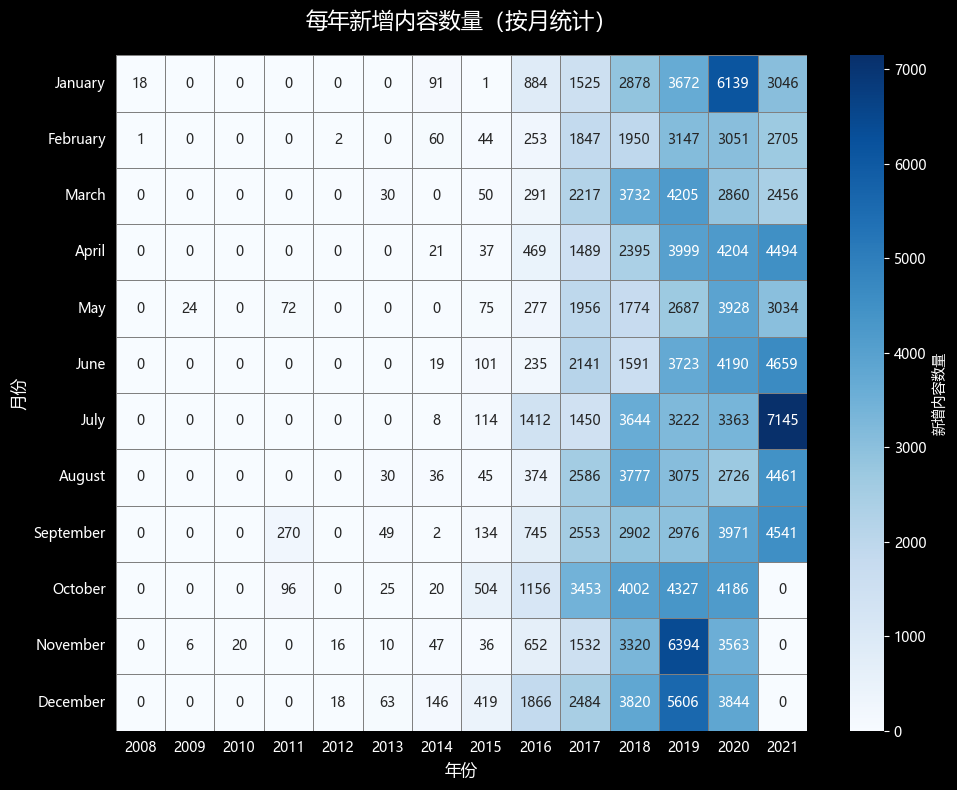

In [52]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 
               'October', 'November', 'December']
content = df_.groupby('year_added')['month_name'].value_counts().unstack().fillna(0)[month_order].T

plt.figure(figsize=(10,8))
sns.heatmap(content, cmap='Blues', annot=True, fmt='g', 
        linewidths=0.5, linecolor='gray',
        cbar_kws={'label': '新增内容数量'})
plt.title("每年新增内容数量（按月统计）", fontsize=16, pad=20)
plt.xlabel('年份', fontsize=12)
plt.ylabel('月份', fontsize=12)
plt.tight_layout()
plt.show()

- 2019 年 11 月和 2021 年 7 月添加的电影和电视节目数量最多  
- 从 2008 年到 2015 年添加的电影和电视节目较少

抖动点图分析：各分级发行年份分布

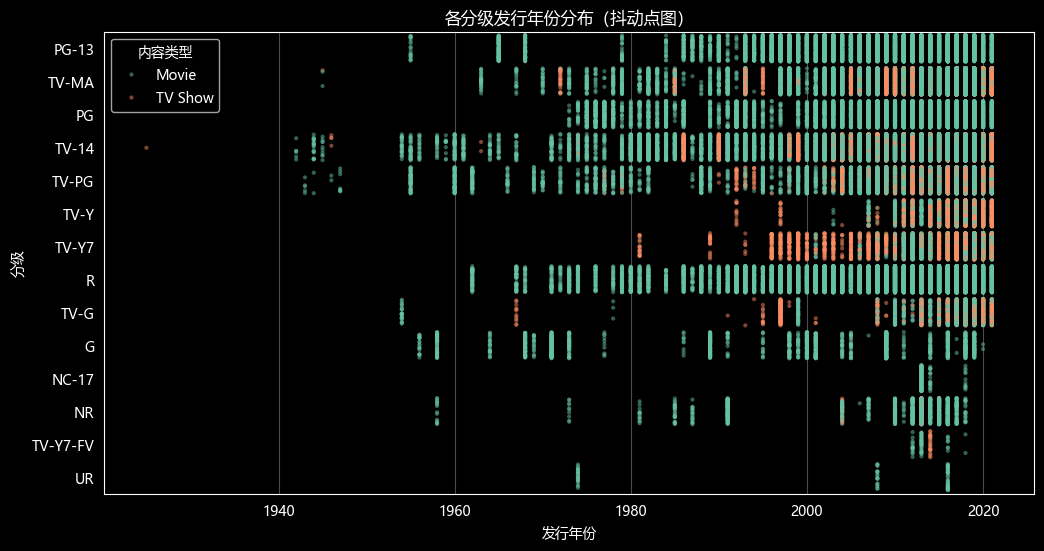

In [53]:
plt.figure(figsize=(12,6))
sns.stripplot(data=df_, x='release_year', y='rating', 
              palette='Set2', jitter=0.4, size=3, alpha=0.5,
              hue='type')
plt.title('各分级发行年份分布（抖动点图）')
plt.xlabel('发行年份')
plt.ylabel('分级')
plt.legend(title='内容类型')
plt.grid(axis='x', alpha=0.3)
plt.show()

| 分级标识 | 适用年龄       | 典型内容特点                     | 代表作品举例          |
|----------|----------------|----------------------------------|-----------------------|
| **TV-Y** | 2–6岁         | 无暴力恐怖内容，情节简单温和     | 《巧虎》系列       |
| **TV-Y7**| 7岁以上        | 含轻微幻想暴力或喜剧冲突         | 《汪汪队立大功》      |
| **G/TV-G**| 全年龄段       | 无争议性内容，适合家庭观看       | 迪士尼经典动画        |
| **PG/TV-PG**| 家长指导建议   | 轻微暴力、简短粗话或暗示性内容   | 《哈利·波特》系列     |
| **PG-13** | 13岁以上       | 中度暴力、短暂性暗示或部分粗话   | 《复仇者联盟》系列    |
| **TV-14** | 14岁以上       | 强烈暴力、性暗示、毒品话题       | 《怪奇物语》          |
| **R**     | 17岁以下需家长陪同 | 高强度暴力、裸露镜头、性内容   | 《小丑》              |
| **TV-MA** | 18岁以上       | 露骨性场景、血腥暴力、重度粗话   | 《纸牌屋》《性爱自修室》|
| **NC-17** | 18岁以上       | 极端暴力、性暴露或扭曲心理描写   | 《色戒》未删减版      |

- Netflix早期上线的电影多为TV-14和TV-PG级别
- 近些年各种分级作品数量逐渐增加
- 但是全年龄向作品数量一直不多

散点图分析：不同时长内容发行年份分布

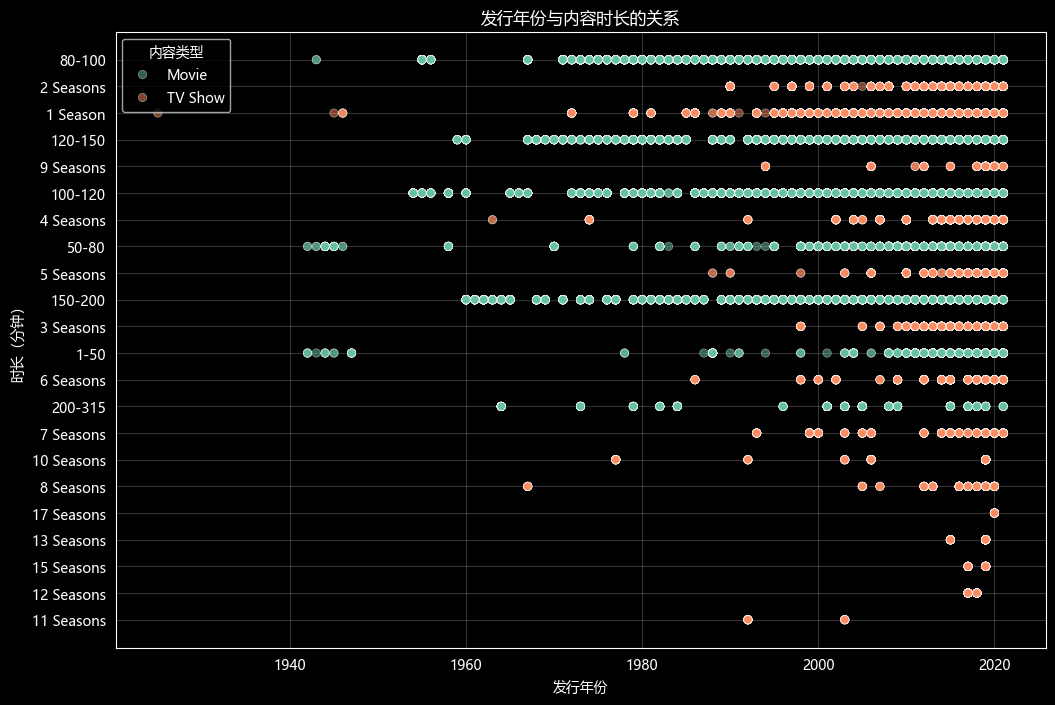

In [54]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=df_, x='release_year', y='duration', 
                hue='type', palette='Set2', alpha=0.5,
                sizes=(20,200))
plt.title('发行年份与内容时长的关系')
plt.xlabel('发行年份')
plt.ylabel('时长（分钟）')
plt.legend(title='内容类型')
plt.grid(alpha=0.2)
plt.show()

- 近年来，电视剧的季数逐渐增加

## 建议

- **核心剧集类型策略**：各国在剧集和电影中最受欢迎的均为**剧情片、喜剧片和国际剧集/电影**，建议重点增加此类内容产量。
- **暑期档上线计划**：新增剧集/电影应集中在**7月1日或8月1日**暑期档期上线。
- **印度市场专项对策**：印度受众的电影内容需增量补充，该市场自**2018年起持续下滑**。
- **主创团队优化方案**：
  - 内容制作需考量目标国家**人气演员/导演**资源
  - 优先采用已获市场验证的**导演-演员黄金组合**
- **影片时长标准**：电影内容时长建议严格控制在**80-120分钟**区间。